In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing
import os
import tensorflow as tf#Set GPU for computation

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [14]:
devices = tf.config.list_physical_devices()
print(devices)
tf.config.set_visible_devices(devices[1], 'GPU')
tf.config.experimental.set_memory_growth(devices[1], True)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [15]:
#importing the image and annotations folders
# import os
# os.environ['GIT_PYTHON_GIT_EXECUTABLE'] = 'C:\Program Files\Git\bin\git.exe'
import cv2 as cv
import io
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import pandas as pd
import numpy as np

%matplotlib inline

#Plot RC
plt.rc('figure', autolayout = True)

In [16]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16517, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 16517 (delta 47), reused 50 (delta 16), pack-reused 16402
Receiving objects: 100% (16517/16517), 15.17 MiB | 23.61 MiB/s, done.
Resolving deltas: 100% (11304/11304), done.


In [ ]:
# Use this cell if you want to run on a combined dataset(this + any custom)
# #Empty list to store images and corresponding annotations in tuple/list format
# images = []
# annotes = []
# yolo_anno_filename = []
# img_size = 640
# new_image_folder_path = r"custom path"
# new_anno_folder_path = r"custom path"

# for img in os.listdir(new_image_folder_path):

#     #reading images using openCV
#     img_path = os.path.join(new_image_folder_path, img)
#     image = cv.imread(img_path)

#     #ToDO; clean redundant code written twice

#     scaling = min(img_size/image.shape[0], img_size/image.shape[1])

#     #Resizing images

#     new_h = int(image.shape[0]*scaling)
#     new_w = int(image.shape[1]*scaling)
    
#     #resizing annotations
#     a_scaling = min(img_size/image.shape[0], img_size/image.shape[1])

#     a_new_h = int(image.shape[0]*a_scaling)
#     a_new_w = int(image.shape[1]*a_scaling)

#     #Padding
#     a_pad_h = (img_size - a_new_h)//2
#     a_pad_w = (img_size - a_new_w)//2
    
#     #reading annotations
#     anno_filename = os.path.splitext(img)[0] + ".xml"
#     yolo_filename = os.path.splitext(img)[0] + ".txt"
#     anno_path = os.path.join(new_anno_folder_path, anno_filename)
#     yolo_anno_filename.append(yolo_filename)

#     if not os.path.exists(anno_path):
#         print(anno_path)
#         raise ValueError(f"No file was found in the given path")
        

#     #Function to get Bouding boxes from the annotations
#     boxes = []
#     tree = ET.parse(anno_path)
#     root = tree.getroot()
#     for objects in root.findall('object'):
#         label = objects.find('name').text
#         xmin = int(objects.find('bndbox/xmin').text)
#         xmin_scaled = (xmin * a_scaling) + a_pad_w
#         ymin = int(objects.find('bndbox/ymin').text)
#         ymin_scaled = (ymin * a_scaling) + a_pad_h
#         xmax = int(objects.find('bndbox/xmax').text)
#         xmax_scaled = (xmax * a_scaling) + a_pad_w
#         ymax = int(objects.find('bndbox/ymax').text)
#         ymax_scaled = (ymax * a_scaling) + a_pad_h
#         boxes.append([label,xmin_scaled,ymin_scaled,xmax_scaled,ymax_scaled])
#     #     boxes.append([label,xmin,ymin,xmax,ymax])
#     annotes.append(boxes)
    
    
#     image_resized = cv.resize(image, (new_w,new_h))

#     #Padding
#     pad_h = (img_size - new_h)//2
#     pad_w = (img_size - new_w)//2

#     img_padded = cv.copyMakeBorder(image_resized,pad_h,img_size-new_h-pad_h,pad_w,img_size-new_w-pad_w,cv.BORDER_CONSTANT,value = (0,0,0))
#     images.append(img_padded)
#     cv.imwrite(img_path,img_padded)
# print('Done')

In [ ]:
# #Converting annotations into suitable format for pretrained YOLO
# for i in range(10):
#     print(annotes[i])
# yolo_annotes = []
# yolo_anno_path = r"custom_path"
# new_lbl = 0
# for i in range(len(annotes)):
    
#     dummy = []
#     for ele in range(len(annotes[i])):
#         lbl = annotes[i][ele][0]
# #         lbl = 0
#         if lbl == 'closed':
#             new_lbl = 0
#         elif lbl == 'fully_open':
#             new_lbl = 1
#         elif lbl == 'semi_open':
#             new_lbl = 2
#         elif lbl == 'titled':
#             new_lbl = 3
#         elif lbl == 'tilted':
#             new_lbl = 3
#         else:
#             print('error')

#         x_cen = ((annotes[i][ele][1] + annotes[i][ele][3])/2)/img_size
#         y_cen = ((annotes[i][ele][2] + annotes[i][ele][4])/2)/img_size
#         width = (annotes[i][ele][3] - annotes[i][ele][1])/img_size
#         height = (annotes[i][ele][4] - annotes[i][ele][2])/img_size
#         annote_yolo = f'{new_lbl} {x_cen:.6f} {y_cen:.6f} {width:.6f} {height:.6f}'
#         dummy.append(annote_yolo)
#     op_filename = yolo_anno_filename[i]
#     output_path = os.path.join(yolo_anno_path,op_filename)
#     with open(output_path, 'w') as f:
#         f.write('\n'.join(dummy))
#     yolo_annotes.append(dummy)
    
# print(yolo_annotes[169])

In [18]:
print(os.listdir('/kaggle/working/yolov5/models'))

['common.py', 'hub', 'tf.py', 'yolo.py', 'segment', '__init__.py', 'yolov5l.yaml', 'yolov5n.yaml', 'experimental.py', 'yolov5m.yaml', 'yolov5x.yaml', 'yolov5s.yaml']


In [19]:
!python /kaggle/working/yolov5/train.py --img 640 --batch 5 --epochs 50 --data /kaggle/input/windows-open-closed-semi-tilted-dataset/utils/utils/custom_cls.yaml --cfg /kaggle/input/windows-open-closed-semi-tilted-dataset/utils/utils/yolov5s.yaml --weights /kaggle/input/windows-open-closed-semi-tilted-dataset/utils/utils/init_weights.pt --cache

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 12.1 MB/s eta 0:00:00a 0:00:01
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-03-14 15:14:25.881966: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-14 15:14:25.882023: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-14 15:14:25.883486: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wa

In [20]:
!python /kaggle/working/yolov5/detect.py --source /kaggle/input/windows-open-closed-semi-tilted-dataset/test/test --weights /kaggle/working/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.5 --name test_1

detect: weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], source=/kaggle/input/windows-open-closed-semi-tilted-dataset/test/test, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=test_1, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7077550 parameters, 0 gradients, 16.0 GFLOPs
image 1/64 /kaggle/input/windows-open-closed-semi-tilted-dataset/test/test/IMG20230610141245.jpg: 640x480 (no detections), 46.6ms
image 2/64 /kaggle/input/windows-open-closed-semi-tilted-dataset/test/test/IMG20230610141250.jpg: 640x480 (n

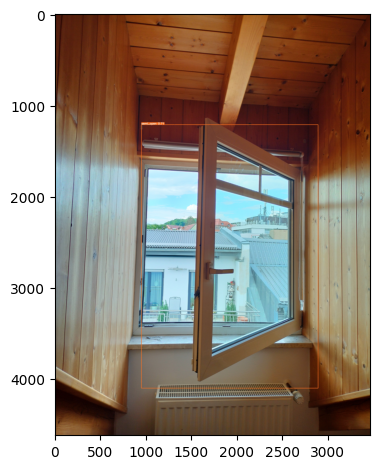

In [23]:
#Display random test detected images
import random
detections_dir = r"/kaggle/working/yolov5/runs/detect/test_1"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = cv.imread(random.choice(detection_images))
random_detection_image = cv.cvtColor(random_detection_image,cv.COLOR_BGR2RGB)
plt.imshow(np.array(random_detection_image))